In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [2]:
# Define base distribution
normal = tfd.Normal(loc=0., scale=1.)
normal_w = tfd.Normal(loc=0., scale=5.)

In [3]:
# Sample from base distribution
n = 1000
z = normal.sample(1000)


### Scale and shift bijector

In [4]:
# Define scale and shift
scale = 4.5
shift = 7


In [5]:
# Define chain bijector
scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])


In [6]:
# We can also use call methods
shift_transf = tfb.Shift(shift)
scale_transf = tfb.Scale(scale)
scale_and_shift_2 = shift_transf(scale_transf)

In [7]:
# Apply the forward transformation
x = scale_and_shift.forward(z)

In [8]:
# Check the forward transformation
tf.norm(x - (scale * z + shift))


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

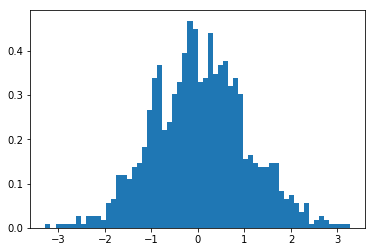

In [9]:
# Plot z density
plt.hist(z, bins=60, density=True)
plt.show()

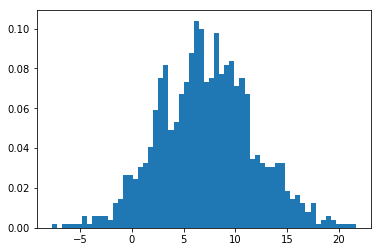

In [10]:
# Plot x density

plt.hist(x, bins=60, density=True)
plt.show()

#### Inverse transformation

In [11]:
# Apply inverse transformation

inv_x = scale_and_shift.inverse(x)

In [12]:
# Check inverse transformation
tf.norm(inv_x - z)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [13]:
# Compute log prob for x
log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[-4.30957   -2.9705577 -2.8154163 -2.742728  -2.4292297 -3.416409
 -2.4607952 -2.4230494 -3.4444792 -3.265291  -2.8647666 -2.433778
 -2.6292238 -3.2402282 -2.440154  -2.435162  -2.925387  -2.4261723
 -3.2364028 -3.676445  -3.2510448 -2.8983655 -3.9069684 -2.507153
 -2.5427182 -2.4251754 -2.9288816 -2.5414727 -2.4237008 -2.450283
 -2.7030811 -3.6288018 -5.7789993 -2.9548187 -2.6220186 -2.4259176
 -3.5646975 -2.470684  -2.4913049 -2.9348874 -2.4238124 -2.4270952
 -2.941426  -2.6726441 -2.4701316 -2.9933674 -2.4244866 -2.7364302
 -3.5067854 -2.4243755 -3.1241584 -2.4299946 -2.869812  -2.813999
 -2.4696186 -2.5260696 -2.54735   -2.5735092 -2.4273934 -3.0697281
 -2.4246871 -2.4676733 -2.4286826 -2.5694237 -2.4572933 -2.5836825
 -2.7348957 -3.3834774 -2.5610003 -2.468466  -3.2941158 -5.2871094
 -2.7508078 -2.6989634 -5.396633  -2.4521663 -3.5877836 -2.429503
 -2.490422  -2.4232888 -2.7144065 -2.4230168 -2.4850447 -2.9510112
 -2.45135   -4.477452  -2.469103  -5.185906  -2.6114316 -

In [14]:
# We can also use the inverse transformation
log_prob_x = (
    normal.log_prob(scale_and_shift.inverse(x))
    + scale_and_shift.inverse_log_det_jacobian(z, event_ndims=0)
)
print(log_prob_x)

tf.Tensor(
[-4.30957   -2.9705577 -2.8154163 -2.742728  -2.4292297 -3.416409
 -2.4607952 -2.4230494 -3.4444792 -3.265291  -2.8647666 -2.433778
 -2.6292238 -3.2402282 -2.440154  -2.435162  -2.925387  -2.4261723
 -3.2364028 -3.676445  -3.2510448 -2.8983655 -3.9069684 -2.507153
 -2.5427182 -2.4251754 -2.9288816 -2.5414727 -2.4237008 -2.450283
 -2.7030811 -3.6288018 -5.7789993 -2.9548187 -2.6220186 -2.4259176
 -3.5646975 -2.470684  -2.4913049 -2.9348874 -2.4238124 -2.4270952
 -2.941426  -2.6726441 -2.4701316 -2.9933674 -2.4244866 -2.7364302
 -3.5067854 -2.4243755 -3.1241584 -2.4299946 -2.869812  -2.813999
 -2.4696186 -2.5260696 -2.54735   -2.5735092 -2.4273934 -3.0697281
 -2.4246871 -2.4676733 -2.4286826 -2.5694237 -2.4572933 -2.5836825
 -2.7348957 -3.3834774 -2.5610003 -2.468466  -3.2941158 -5.2871094
 -2.7508078 -2.6989634 -5.396633  -2.4521663 -3.5877836 -2.429503
 -2.490422  -2.4232888 -2.7144065 -2.4230168 -2.4850447 -2.9510112
 -2.45135   -4.477452  -2.469103  -5.185906  -2.6114316 -

### Broadcasting

In [15]:
x = tf.random.normal(shape=(100, 1))

In [16]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [17]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.2, 1.0])
y = softfloor.forward(x)
print(y.shape)


(100, 2)


In [18]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.01, 0.1, 1.0])

In [19]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

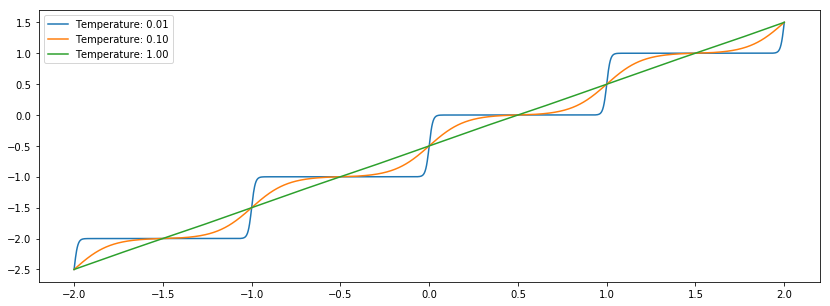

In [20]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3, softfloor,['temperature'], x)

In [21]:
# Gumbel bijector using broadcasting
exps = tfb.GumbelCDF(loc=[0.5, 1, 1.5, 2, 3], scale=[1,2,2,3,4])

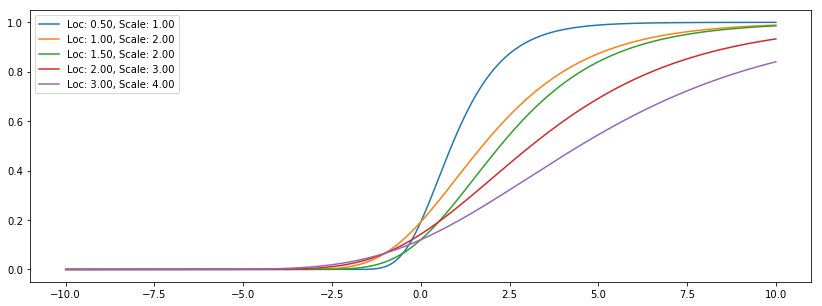

In [22]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5, exps,['loc', 'scale'], x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [23]:
# Parameters

n = 10000
loc = 0
scale = 1.0

In [24]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [25]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [26]:
# Exponential bijector
exp = tfb.Exp()

In [27]:
# Log normal transformed distribution using exp and normal bijectors
log_normal_td = exp(normal)

In [28]:
# Display event and batch shape

print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)


batch shape:  ()
event shape:  ()


In [29]:
# Base distribution
z = normal.sample(n)


#### Plots

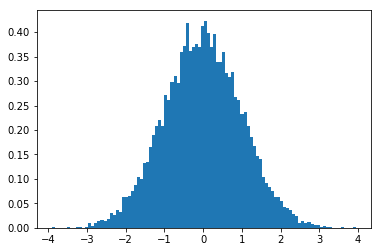

In [30]:
# Plot z density
plt.hist(z,bins=100, density=True)
plt.show()


In [31]:
# Transformed distribution

x = log_normal_td.sample(n)

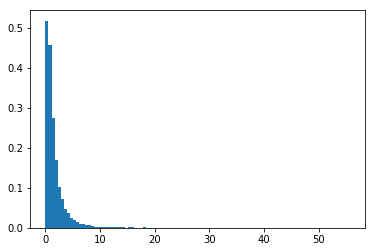

In [32]:
# Plot x density
plt.hist(x, bins=100, density=True)
plt.show()


In [33]:
# Define log normal distribution
log_normal = tfd.LogNormal(loc=loc, scale=scale)


In [34]:
# Sample log_normal
l = log_normal_td.sample(n)


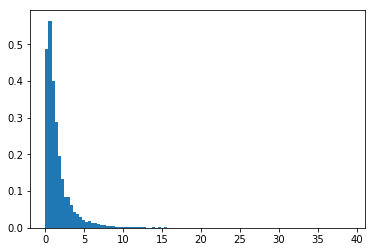

In [35]:
# Plot l density
plt.hist(l, bins=100, density=True)
plt.show()


#### Log probability

In [36]:
# Log prob of LogNormal
log_prob = log_normal.log_prob(x)


In [37]:
# Log prob of log normal transformed distribution
log_prob_td = log_normal_td.log_prob(x)


In [38]:
# Check log probs
tf.norm(log_prob - log_prob_td)


<tf.Tensor: shape=(), dtype=float32, numpy=3.517684e-06>

### Event shape and batch shape

In [39]:
# Set a scaling lower triangular matrix
tril = tf.random.normal((2,4,4))
scale_low_tri  = tf.linalg.LinearOperatorLowerTriangular(tril)

In [40]:
# View of scale_low_tri
scale_low_tri.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[ 1.7762432 ,  0.        ,  0.        ,  0.        ],
        [ 1.5383279 ,  0.75967205,  0.        ,  0.        ],
        [ 1.0605228 ,  0.12989268, -0.6522818 ,  0.        ],
        [ 1.6382741 ,  2.4117029 ,  0.24605511,  0.98754007]],

       [[-0.8680401 ,  0.        ,  0.        ,  0.        ],
        [ 0.29842064,  1.561746  ,  0.        ,  0.        ],
        [-0.29482028,  3.1628985 ,  0.9447837 ,  0.        ],
        [ 0.2905729 , -0.28887805,  2.2439792 ,  0.07280636]]],
      dtype=float32)>

In [41]:
# Define scale linear operator
scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)


In [42]:
# define scale linear operator transformed distribution with batch and event shape

mvn = tfd.TransformedDistribution(normal, scale_lin_op, batch_shape=[2], event_shape=[4])

print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_linear_operatorNormal", batch_shape=[2], event_shape=[4], dtype=float32)


In [43]:
# Display event and batch shape
print("batch shape:", mvn.batch_shape)
print("event shape:", mvn.event_shape)


batch shape: (2,)
event shape: (4,)


In [44]:
# Sample
y1 = mvn.sample(sample_shape=[n])
print(y1.shape)

(10000, 2, 4)


In [45]:
# Define a MultivariateNormalLinearOperator distribution
mvn2 = tfd.MultivariateNormalLinearOperator(loc=0, scale=scale_low_tri)
print(mvn2)

tfp.distributions.MultivariateNormalLinearOperator("MultivariateNormalLinearOperator", batch_shape=[2], event_shape=[4], dtype=float32)


In [46]:
# Display event and batch shape
print("batch shape:", mvn2.batch_shape)
print("event shape:", mvn2.event_shape)


batch shape: (2,)
event shape: (4,)


In [47]:
# Sample
y2 = mvn2.sample(sample_shape=[n])
print(y2.shape)


(10000, 2, 4)


In [48]:
# Check
xn = normal.sample((n, 2, 4))
tf.norm(mvn.log_prob(xn) - mvn2.log_prob(xn)) /tf.norm(mvn.log_prob(xn))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [49]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)

    def _forward(self, x):
        x = tf.cast(x, tf.float32)
        return tf.squeeze(tf.pow(self.a * x + self.b, 3))
    
    def _inverse(self, y):
        y = tf.cast(y, tf.float32)
        return (tf.math.sign(y) * tf.pow(tf.abs(y), 1/3) - self.b) / self.a
    
    def _forward_log_det_jacobian(self, x):
        x = tf.cast(x, tf.float32)
        return tf.math.log(3 * tf.abs(self.a)) + 2 * tf.math.log(tf.abs(self.a * x + self.b))

In [50]:
# Cubic bijector

cubic = Cubic([1.0, -2.0], [-1.0, 0.4], validate_args=True)

In [51]:
# Apply forward transformation
x = tf.constant([[1, 2], [3, 4]])
y = cubic.forward(x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [52]:
# Check inverse
np.linalg.norm(x - cubic.inverse(y))

0.0

#### Function plots

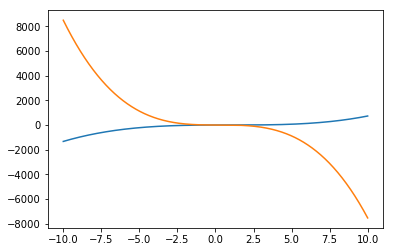

In [53]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)

plt.plot(x, cubic(x))
plt.show()

In [54]:
# Display shape
print(cubic(x).shape)

(500, 2)


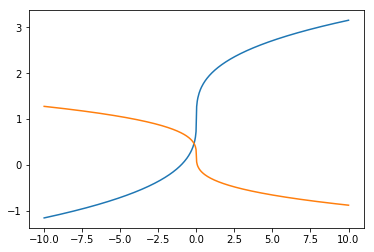

In [55]:
# Plot the inverse
plt.plot(x, cubic.inverse(x))
plt.show()

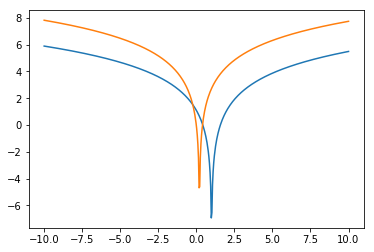

In [56]:
# Plot the forward log Jacobian determinant
plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))
plt.show()


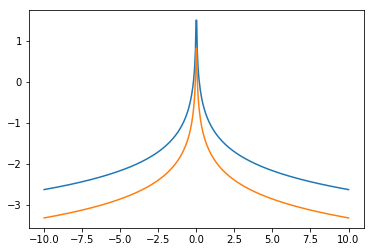

In [57]:
# Plot the inverse log Jacobian determinant
plt.plot(x, cubic.inverse_log_det_jacobian(x, event_ndims=0))
plt.show()



#### TransformedDistribution and plots

In [58]:
# Create a transformed distribution with Cubic
normal = tfd.Normal(loc=0.0, scale=1.0)
cubed_normal = tfd.TransformedDistribution(normal, cubic, event_shape=[2])


In [59]:
# Sample cubed_normal
n = 1000
g = cubed_normal.sample(n)
g.shape

TensorShape([1000, 2])

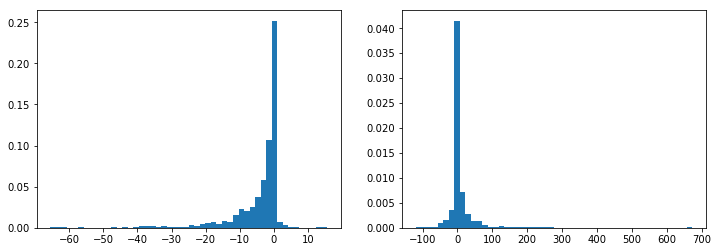

In [60]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

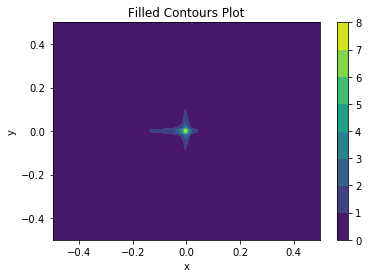

In [61]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [62]:
# Create a transformed distribution with the inverse of Cube
inverse_cubic = tfb.Invert(cubic)
inv_cubed_normal = inverse_cubic(normal, event_shape=[2])


In [63]:
# Samble inv_cubed_normal
n = 1000
g = inv_cubed_normal.sample(n)
g.shape


TensorShape([1000, 2])

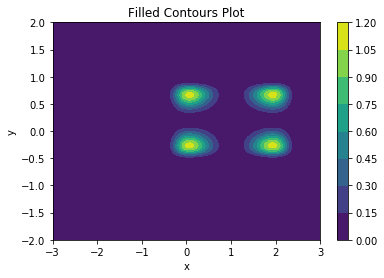

In [64]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

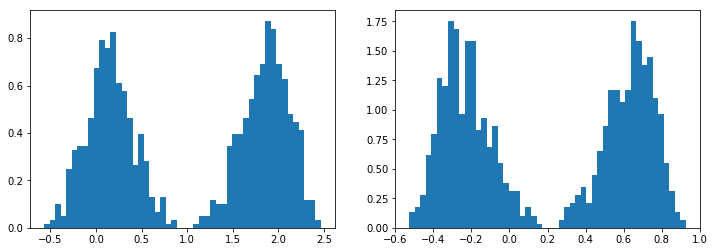

In [65]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [66]:
# Create a mixture of four Gaussians
probs = [0.45, 0.55]
mix_gauss = tfd.Mixture(
    cat=tfd.Categorical(probs=probs),
    components=[
        tfd.Normal(loc=2.3, scale=0.4),
        tfd.Normal(loc=-0.8, scale=0.4),
    ]
)

In [67]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


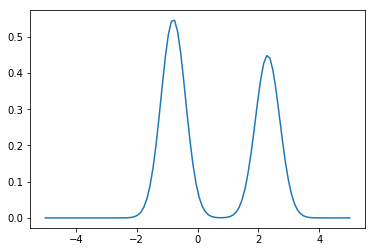

In [68]:
# Plot the data distribution
x = np.linspace(-5, 5, 100)
plt.plot(x, mix_gauss.prob(x))
plt.show()

In [69]:
# Make a trainable bijector
trainable_inv_cubic = tfb.Invert(Cubic(tf.Variable(0.25), tf.Variable(-0.1)))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [70]:
# Make a trainable transformed distribution

trainable_dist = tfd.TransformedDistribution(normal, trainable_inv_cubic)

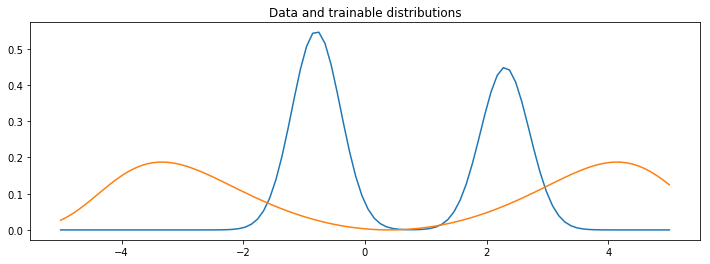

In [71]:
# Plot the data and learned distributions
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12,4))
plt.plot(x, mix_gauss.prob(x), label="data")
plt.plot(x, trainable_dist.prob(x), label="trainable")
plt.title("Data and trainable distributions")
plt.show()


In [72]:
# Train the bijector

num_epochs = 20
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...
Epoch 15...
Epoch 16...
Epoch 17...
Epoch 18...
Epoch 19...


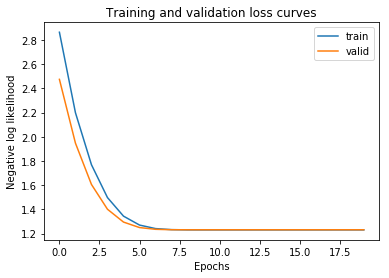

In [73]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

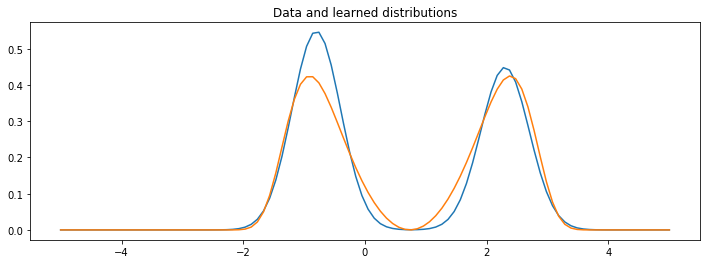

In [74]:
# Plot the data and learned distributions
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12,4))
plt.plot(x, mix_gauss.prob(x), label="data")
plt.plot(x, trainable_dist.prob(x), label="trainable")
plt.title("Data and learned distributions")
plt.show()

In [75]:
# Display trainable variables
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5672784>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.41920874>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [76]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2, 2)

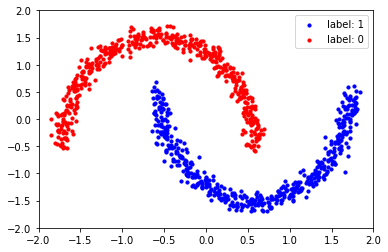

In [77]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [78]:
# Define base distribution
base_distribution = tfd.Normal(loc=0, scale=1)


In [79]:
# Define the trainable distribution
def make_masked_autoregressive_flow(hidden_units=[16, 16], activation='relu'):
    made = tfb.AutoregressiveNetwork(
        params=2,
        event_shape=[2],
        hidden_units=hidden_units,
        activation=activation,
    )
    return tfb.MaskedAutoregressiveFlow(
        shift_and_log_scale_fn=made,
    )

trainable_distribution = tfd.TransformedDistribution(
    base_distribution,
    make_masked_autoregressive_flow(),
    event_shape=[2],
)



In [80]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [81]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

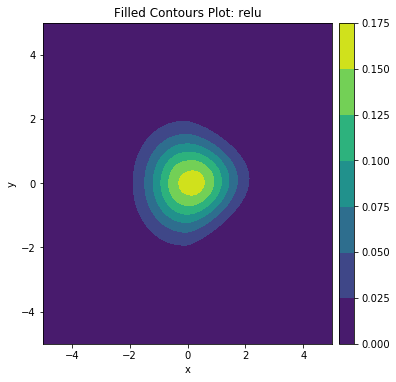

In [82]:
# Plot contour

activation = 'relu'
maf = tfd.TransformedDistribution(
    base_distribution,
    make_masked_autoregressive_flow(activation=activation),
    event_shape=[2],
)
plot_contour_prob([maf], scale_fig=6, title=[activation])


In [83]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [84]:
# Make samples

x = base_distribution.sample((1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

In [85]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

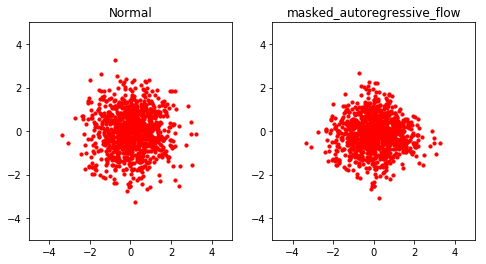

In [86]:
# Plot
_plot(samples)


#### Training a MaskedAutoregressiveFlow bijector

In [87]:
from tensorflow.keras.callbacks import LambdaCallback

In [88]:
x_ = Input(shape=(2,), dtype=tf.float32)
log_prob_ = trainable_distribution.log_prob(x_)
model = Model(x_, log_prob_)

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=lambda _, log_prob: -log_prob
)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
autoregressive_network (Autoreg (None, 2, 2)         388         input_3[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_unstack_1 (TensorFl [(None, 2), (None, 2 0           autoregressive_network[1][0]     
__________________________________________________________________________________________________
tf_op_layer_Sub_1 (TensorFlowOp [(None, 2)]          0           input_3[0][0]         

In [89]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [90]:
# Train the distribution

history = train_dist_routine(trainable_distribution, n_epochs=600, n_disp=50)


 Epoch 1/600 
	 loss: 2.8587, val_loss: 2.8156

 Epoch 51/600 
	 loss: 2.6792, val_loss: 2.6855

 Epoch 101/600 
	 loss: 2.6567, val_loss: 2.6696

 Epoch 151/600 
	 loss: 2.6384, val_loss: 2.6521

 Epoch 201/600 
	 loss: 2.6122, val_loss: 2.6267

 Epoch 251/600 
	 loss: 2.5724, val_loss: 2.5877

 Epoch 301/600 
	 loss: 2.5089, val_loss: 2.5251

 Epoch 351/600 
	 loss: 2.4078, val_loss: 2.4280

 Epoch 401/600 
	 loss: 2.2732, val_loss: 2.2940

 Epoch 451/600 
	 loss: 2.1803, val_loss: 2.1835

 Epoch 501/600 
	 loss: 2.1341, val_loss: 2.1338

 Epoch 551/600 
	 loss: 2.1015, val_loss: 2.1004


In [91]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

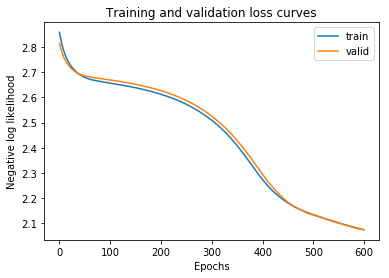

In [92]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [93]:
# Make samples

x = base_distribution.sample((1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

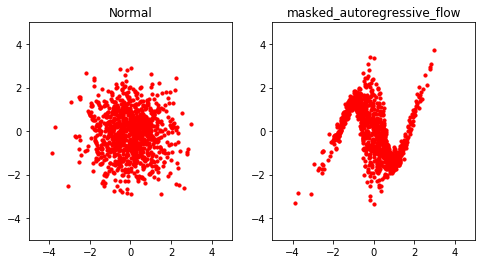

In [94]:
# Plot

_plot(samples)

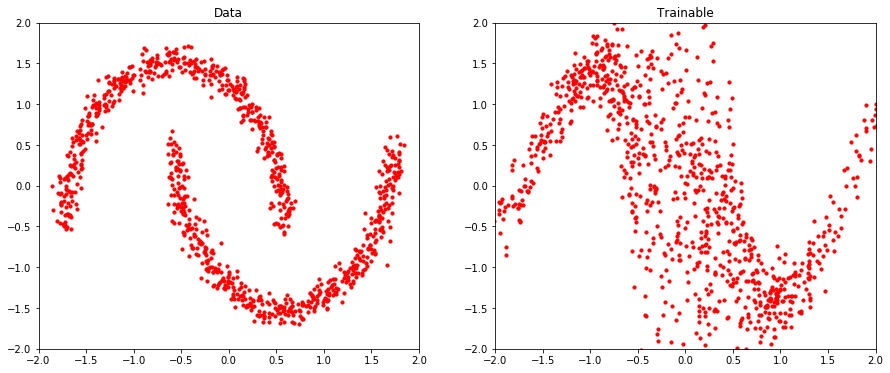

In [95]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

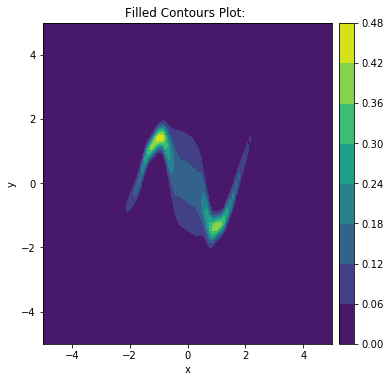

In [96]:
# Plot contour

plot_contour_prob([trainable_distribution], scale_fig=6)

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [97]:
# Define a more expressive model
num_bijectors = 6
bijectors = []
for i in range(num_bijectors):
    masked_auto_i = make_masked_autoregressive_flow(hidden_units=[256, 256], activation="relu")
    bijectors.append(masked_auto_i)
    bijectors.append(tfb.Permute(permutation=[1, 0]))

flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))

In [98]:
trainable_distribution = tfd.TransformedDistribution(
    distribution=base_distribution,
    bijector=flow_bijector,
    event_shape=[2],
)

In [99]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

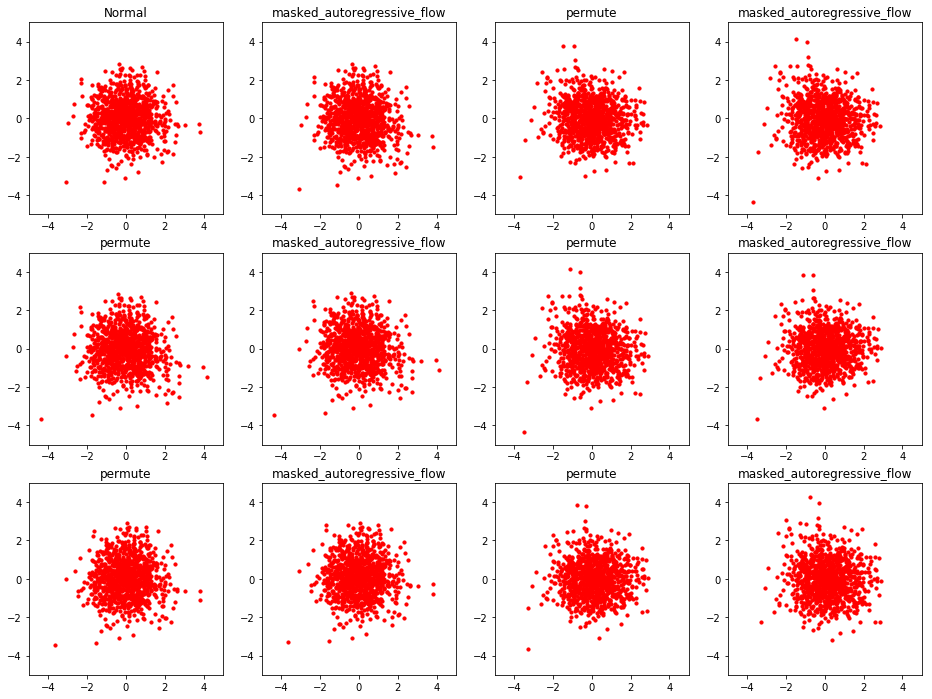

In [100]:
# Plot

_plot(samples, 3)

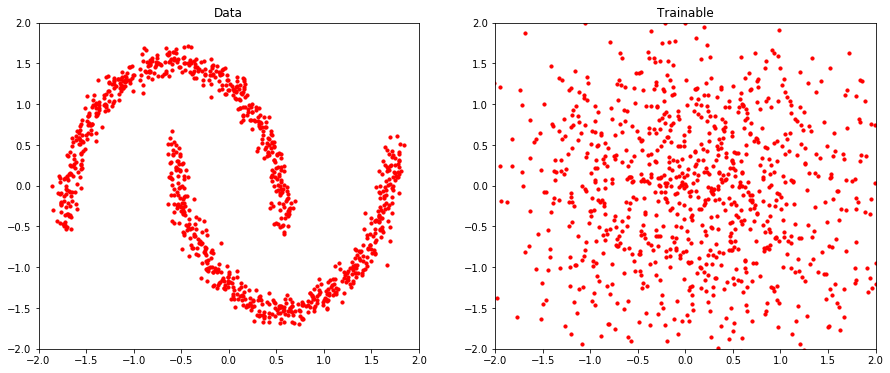

In [101]:
# Plot
visualize_training_data(samples)


In [102]:
# Train the distribution
history = train_dist_routine(trainable_distribution, n_epochs=800, n_disp=50)


 Epoch 1/800 
	 loss: 2.8711, val_loss: 2.6615

 Epoch 51/800 
	 loss: 2.1823, val_loss: 2.1950

 Epoch 101/800 
	 loss: 2.2101, val_loss: 2.2104

 Epoch 151/800 
	 loss: 1.8421, val_loss: 2.6763

 Epoch 201/800 
	 loss: 2.4770, val_loss: 2.4418

 Epoch 251/800 
	 loss: 2.4288, val_loss: 2.4421

 Epoch 301/800 
	 loss: 1.9751, val_loss: 1.9523

 Epoch 351/800 
	 loss: 1.7635, val_loss: 1.7888

 Epoch 401/800 
	 loss: 1.6943, val_loss: 1.8027

 Epoch 451/800 
	 loss: 1.4977, val_loss: 1.8487

 Epoch 501/800 
	 loss: 1.4634, val_loss: 1.7072

 Epoch 551/800 
	 loss: 1.3559, val_loss: 1.7882

 Epoch 601/800 
	 loss: 1.3233, val_loss: 1.9113

 Epoch 651/800 
	 loss: 1.2947, val_loss: 1.7190

 Epoch 701/800 
	 loss: 1.2727, val_loss: 1.5634

 Epoch 751/800 
	 loss: 1.2534, val_loss: 1.5653


In [103]:
# Get losses
train_losses = history.history['loss']
valid_losses = history.history['val_loss']

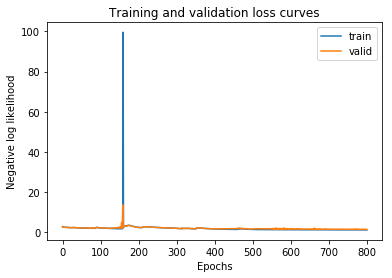

In [104]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [105]:
# Make samples and plot
names, samples = make_samples()

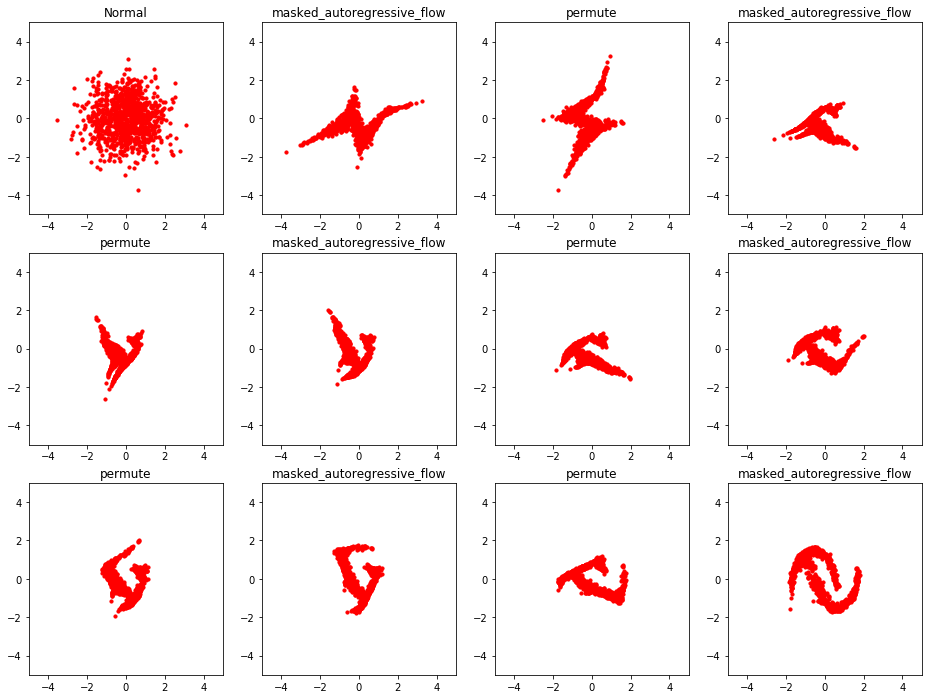

In [106]:
# Plot

_plot(samples, 3)

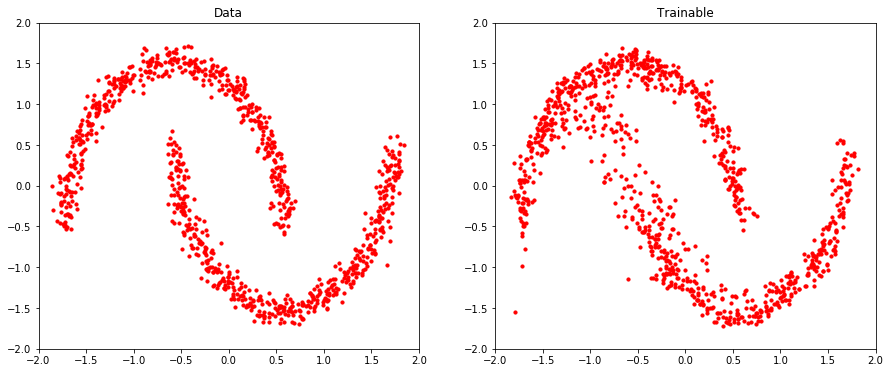

In [107]:
# Plot

visualize_training_data(samples)

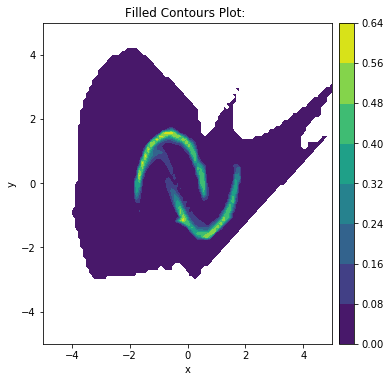

In [108]:
plot_contour_prob([trainable_distribution], scale_fig=6)